In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Предварительный анализ

In [4]:
Im_16_20 = pd.read_csv('Data/2016-2017 import.csv', encoding = 'ANSI' )
Im_11_15 = pd.read_csv('Data/2011-2015 import.csv', encoding = 'ANSI' )
Im_06_10 = pd.read_csv('Data/2006-2010 import.csv', encoding = 'ANSI' )
Im_01_05 = pd.read_csv('Data/2001-2005 import.csv', encoding = 'ANSI' )
Im_01_05[Im_01_05['Qty'] == 0]['Qty'] = Im_01_05[Im_01_05['Qty'] == 0]['Unnamed: 47']
Im_06_10[Im_06_10['Qty'] == 0]['Qty'] = Im_06_10[Im_06_10['Qty'] == 0]['Unnamed: 47']
Im_11_15[Im_11_15['Qty'] == 0]['Qty'] = Im_11_15[Im_11_15['Qty'] == 0]['Unnamed: 47']
Im_16_20[Im_16_20['Qty'] == 0]['Qty'] = Im_16_20[Im_16_20['Qty'] == 0]['Unnamed: 47']
Im_16_20 = Im_16_20.loc[:, ~Im_16_20. columns.str.contains('^Unnamed')]
Im_11_15 = Im_11_15.loc[:, ~Im_11_15. columns.str.contains('^Unnamed')]
Im_06_10 = Im_06_10.loc[:, ~Im_06_10. columns.str.contains('^Unnamed')]
Im_01_05 = Im_01_05.loc[:, ~Im_01_05. columns.str.contains('^Unnamed')]

In [5]:
col = ['TypeCode', 'FreqCode', 'RefPeriodId', 'RefMonth', 'ReporterCode', 'ReporterISO',
              'FlowCode', 'PartnerCode', 'PartnerISO', 'Partner2Code', 'Partner2ISO', 'ClassificationCode', 
               'ClassificationSearchCode', 'QtyUnitAbbr',
               'IsOriginalClassification', 'IsReported', 'IsAggregate', 'CmdCode', 'AggrLevel', 'IsLeaf',
               'CustomsDesc', 'CustomsCode', 'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'Partner2Desc',
               'AltQtyUnitCode', 'Fobvalue', 'AltQtyUnitAbbr', 'AtlQty', 'IsAltQtyEstimated', 'IsQtyEstimated',
               'IsNetWgtEstimated', 'IsGrossWgtEstimated', 'Cifvalue', 'NetWgt', 'GrossWgt', 'LegacyEstimationFlag', 
       'RefYear', 'Period']
Im_16_20 = Im_16_20.drop(col, axis='columns').copy()
Im_06_10 = Im_06_10.drop(col, axis='columns').copy()
Im_11_15 = Im_11_15.drop(col, axis='columns').copy()
Im_01_05 = Im_01_05.drop(col, axis='columns').copy()

In [6]:
def drop_unnecessary(Im1):
    return (Im1['PartnerDesc'] !='Areas, nes') & (Im1['ReporterDesc'] !='Other Asia, nes') & (Im1['PartnerDesc'] != 'North America and Central America, nes') & (Im1['PartnerDesc'] != 'Other Asia, nes') & (Im1['PartnerDesc'] != 'Other Europe, nes') & (Im1['PartnerDesc'] != 'Special Categories') & (Im1['PartnerDesc'] != Im1['ReporterDesc'])
def get_another(Im1):
    return (Im1['PartnerDesc'] != 'World')

In [7]:
def drop_RD(WIm_16_20):
    WIm_16_20 = WIm_16_20.sort_values(by = 'ReporterDesc', ascending = True)
    WIm_16_20 = WIm_16_20.reset_index()
    WIm_16_20 = WIm_16_20.drop(['index'], axis = 1)
    WIm_16_20.reset_index(inplace=True)

In [8]:
def res_in(WIm_16_20):
    WIm_16_20 = WIm_16_20.sort_values(by = 'ReporterDesc', ascending = True)
    WIm_16_20 = WIm_16_20.reset_index()  
    WIm_16_20.reset_index(inplace=True)
    WIm_16_20 = WIm_16_20.drop(['index'], axis = 1)
    return WIm_16_20

In [9]:
Im_16_20=Im_16_20[drop_unnecessary(Im_16_20) & get_another(Im_16_20)]
Im_06_10=Im_06_10[drop_unnecessary(Im_06_10) & get_another(Im_06_10)]
Im_11_15=Im_11_15[drop_unnecessary(Im_11_15) & get_another(Im_11_15)]
Im_01_05=Im_01_05[drop_unnecessary(Im_01_05) & get_another(Im_01_05)]

In [10]:
price = Im_16_20.dropna().sum()['PrimaryValue']/Im_16_20.dropna().sum()['Qty']
Im_16_20['Qty'] = Im_16_20['Qty'].fillna(Im_16_20['PrimaryValue']/price).copy()
price = Im_06_10.dropna().sum()['PrimaryValue']/Im_06_10.dropna().sum()['Qty']
Im_06_10['Qty'] = Im_06_10['Qty'].fillna(Im_06_10['PrimaryValue']/price).copy()
price = Im_11_15.dropna().sum()['PrimaryValue']/Im_11_15.dropna().sum()['Qty']
Im_11_15['Qty'] = Im_11_15['Qty'].fillna(Im_11_15['PrimaryValue']/price).copy()
price = Im_01_05.dropna().sum()['PrimaryValue']/Im_01_05.dropna().sum()['Qty']
Im_01_05['Qty'] = Im_01_05['Qty'].fillna(Im_01_05['PrimaryValue']/price).copy()

In [11]:
def agr_years(Im1):
    Im1_agr = pd.DataFrame(Im1.groupby(by = ['ReporterDesc', 'PartnerDesc'])[['PrimaryValue', 'Qty']].sum())
    Im1_agr.index = Im1_agr.index.set_names(['ReporterDesc', 'PartnerDesc'])
    Im1_agr.reset_index(inplace=True)
    return Im1_agr

In [12]:
aIm_16_20 = agr_years(Im_16_20)
aIm_11_15 = agr_years(Im_11_15)
aIm_06_10 = agr_years(Im_06_10)
aIm_01_05 = agr_years(Im_01_05)

In [13]:
aIm_16_20.head(10)

,ReporterDesc,PartnerDesc,PrimaryValue,Qty
0,Afghanistan,Azerbaijan,7.797488e+06,2.121909e+07
1,Afghanistan,China,2.392110e+05,5.980270e+05
2,Afghanistan,Iran,2.160327e+08,5.955653e+08
3,Afghanistan,Kazakhstan,2.327081e+08,6.401172e+08
4,Afghanistan,Pakistan,3.246000e+03,8.115000e+03
5,Afghanistan,Russian Federation,1.655448e+07,4.455844e+07
6,Afghanistan,Tajikistan,9.316000e+03,2.328900e+04
7,Afghanistan,Turkmenistan,4.274165e+08,1.127645e+09
8,Afghanistan,Tьrkiye,1.420800e+04,3.552000e+04
9,Afghanistan,United Arab Emirates,1.964578e+06,4.911445e+06


In [14]:
Ex_01_05 = agr_years(aIm_01_05.rename(columns = {'ReporterDesc':'PartnerDesc', 'PartnerDesc':'ReporterDesc'}))
Ex_06_10 = agr_years(aIm_06_10.rename(columns = {'ReporterDesc':'PartnerDesc', 'PartnerDesc':'ReporterDesc'}))
Ex_11_15 = agr_years(aIm_11_15.rename(columns = {'ReporterDesc':'PartnerDesc', 'PartnerDesc':'ReporterDesc'}))
Ex_16_20 = agr_years(aIm_16_20.rename(columns = {'ReporterDesc':'PartnerDesc', 'PartnerDesc':'ReporterDesc'}))

In [15]:

aEx_01_05 = Ex_01_05[drop_unnecessary(Ex_01_05) & get_another(Ex_01_05)]
aEx_06_10 = Ex_06_10[drop_unnecessary(Ex_06_10) & get_another(Ex_06_10)]
aEx_11_15 = Ex_11_15[drop_unnecessary(Ex_11_15) & get_another(Ex_11_15)]
aEx_16_20 = Ex_16_20[drop_unnecessary(Ex_16_20) & get_another(Ex_16_20)]

In [16]:
WEx_01_05 = res_in(aEx_01_05.groupby(by = 'ReporterDesc').sum())
WEx_06_10 = res_in(aEx_06_10.groupby(by = 'ReporterDesc').sum())
WEx_11_15 = res_in(aEx_11_15.groupby(by = 'ReporterDesc').sum())
WEx_16_20 = res_in(aEx_16_20.groupby(by = 'ReporterDesc').sum())

In [17]:
WIm_16_20 = res_in(Im_16_20.groupby(by = 'ReporterDesc').sum())
WIm_11_15 = res_in(Im_11_15.groupby(by = 'ReporterDesc').sum())
WIm_06_10 = res_in(Im_06_10.groupby(by = 'ReporterDesc').sum())
WIm_01_05 = res_in(Im_01_05.groupby(by = 'ReporterDesc').sum())

In [18]:
Im_list = [['Import in 2016-2020', aIm_16_20], ['Import in 2011-2015', aIm_11_15], ['Import in 2006-2010', aIm_06_10], ['Import in 2001-2005', aIm_01_05]]
Im_list = Im_list[::-1]
Ex_list = [['Export in 2001-2005', aEx_01_05], ['Export in 2006-2010', aEx_06_10], ['Export in 2011-2015', aEx_11_15], ['Export in 2016-2020', aEx_16_20]]
WIm_list = [['World Import in 2001-2005', WIm_01_05], ['World Import in 2006-2010', WIm_06_10], ['World Import in 2011-2015', WIm_11_15], ['World Import in 2016-2020', WIm_16_20]]
WEx_list = [['World Export in 2001-2005', WEx_01_05], ['World Export in 2006-2010', WEx_06_10], ['World Export in 2011-2015', WEx_11_15], ['World Export in 2016-2020', WEx_16_20]]

In [19]:
for i in Im_list:
    print(i[0]+'\n')
    print(pd.DataFrame(i[1][['PrimaryValue', 'Qty']].describe()))
    print('\n')

Import in 2001-2005

       PrimaryValue           Qty
count  3.158000e+03  3.158000e+03
mean   1.648562e+08  1.483628e+09
std    2.017955e+09  2.963325e+10
min    1.000000e+00  0.000000e+00
25%    4.397854e+03  1.837028e+03
50%    1.561085e+05  2.231150e+05
75%    4.171023e+06  1.165874e+07
max    9.970456e+10  1.357616e+12


Import in 2006-2010

       PrimaryValue           Qty
count  3.761000e+03  3.761000e+03
mean   3.032655e+08  8.048553e+08
std    2.735147e+09  7.630945e+09
min    1.000000e+00  0.000000e+00
25%    6.683000e+03  1.794000e+03
50%    3.293010e+05  2.545450e+05
75%    1.077464e+07  1.552785e+07
max    1.143193e+11  2.956420e+11


Import in 2011-2015

       PrimaryValue           Qty
count  3.988000e+03  3.988000e+03
mean   4.354452e+08  7.903938e+08
std    3.399199e+09  6.360170e+09
min    1.000000e+00  0.000000e+00
25%    6.306822e+03  1.031750e+03
50%    3.162814e+05  1.987670e+05
75%    1.272082e+07  1.558088e+07
max    7.418018e+10  1.346474e+11


Import in 201

In [20]:
for i in WEx_list:
    print(i[0]+'\n')
    print(pd.DataFrame(i[1][['PrimaryValue', 'Qty']].describe()))    
    print('\n')

World Export in 2001-2005

       PrimaryValue           Qty
count  1.810000e+02  1.810000e+02
mean   2.876331e+09  2.588563e+10
std    1.000290e+10  1.315001e+11
min    1.900000e+01  0.000000e+00
25%    6.095440e+05  1.575160e+06
50%    1.113771e+07  3.754330e+07
75%    3.362163e+08  1.424510e+09
max    9.970731e+10  1.434828e+12


World Export in 2006-2010

       PrimaryValue           Qty
count  1.920000e+02  1.920000e+02
mean   5.940528e+09  1.576594e+10
std    1.799780e+10  4.810639e+10
min    8.000000e+00  0.000000e+00
25%    8.011700e+05  9.893572e+05
50%    2.850009e+07  3.762184e+07
75%    8.103552e+08  1.415176e+09
max    1.262851e+11  3.541636e+11


World Export in 2011-2015

       PrimaryValue           Qty
count  1.950000e+02  1.950000e+02
mean   8.905412e+09  1.616457e+10
std    2.961444e+10  5.397914e+10
min    2.218000e+00  3.000000e+00
25%    6.367398e+05  5.677029e+05
50%    5.254138e+07  8.029386e+07
75%    1.347767e+09  1.838763e+09
max    2.584300e+11  4.446217e+

In [21]:
for i in WIm_list:
    print(i[0]+'\n')
    print(pd.DataFrame(i[1][['PrimaryValue', 'Qty']].describe()))
    print('\n')

World Import in 2001-2005

       PrimaryValue           Qty
count  1.790000e+02  1.790000e+02
mean   2.908468e+09  2.617485e+10
std    1.253160e+10  1.408619e+11
min    4.740000e+02  4.360000e+02
25%    4.705390e+06  8.527922e+06
50%    3.501566e+07  1.077933e+08
75%    6.902329e+08  4.270419e+09
max    1.204934e+11  1.364229e+12


World Import in 2006-2010

       PrimaryValue           Qty
count  1.850000e+02  1.850000e+02
mean   6.165305e+09  1.636249e+10
std    2.246593e+10  5.976150e+10
min    2.036800e+04  1.949500e+04
25%    1.221677e+07  1.470573e+07
50%    1.039344e+08  1.599450e+08
75%    1.985202e+09  4.603697e+09
max    2.079082e+11  5.517808e+11


World Import in 2011-2015

       PrimaryValue           Qty
count  1.820000e+02  1.820000e+02
mean   9.541513e+09  1.731918e+10
std    3.534283e+10  6.356531e+10
min    3.958500e+04  5.646000e+03
25%    2.682806e+07  2.019595e+07
50%    2.316976e+08  2.320167e+08
75%    3.214839e+09  5.947187e+09
max    3.781407e+11  6.863783e+

In [22]:
def plot_pie(WIm, q = 0.015, indent = 0.5):
    WIm_agr = WIm[1]
    sumex = WIm_agr['PrimaryValue'].sum()
    x = WIm_agr.sort_values(by = 'PrimaryValue', ascending = True)
    x['PrimaryValue']=x['PrimaryValue']/sumex
    x = x[x.PrimaryValue>q]
    x = x.append({'ReporterDesc':'Others (<' + str(q*100) + '%)','PrimaryValue': 1-x['PrimaryValue'].sum()}, ignore_index=True)
    
    plt.figure(figsize=(14, 7))
    plt.subplots_adjust(wspace = indent)
    plt.subplot(1,2,1)
    plt.pie(x['PrimaryValue'], labels=x['ReporterDesc'], autopct='%1.1f%%', 
           rotatelabels = True, startangle =90, pctdistance = 1.2, labeldistance = 1.35, textprops = {'fontsize': 10})
    plt.axis('equal')
    plt.title(WIm[0]+' by value', fontsize = 12, x= 0.5 , y= 1.3 )
    
    sumex = WIm_agr['Qty'].sum()
    x = WIm_agr.sort_values(by = 'Qty', ascending = True)
    x['Qty']=x['Qty']/sumex
    x = x[x.Qty>q]
    x = x.append({'ReporterDesc':'Others (<' + str(q*100) + '%)','Qty': 1-x['Qty'].sum()}, ignore_index=True)

    plt.subplot(1,2,2)
    plt.pie(x['Qty'], labels=x['ReporterDesc'], autopct='%1.1f%%', 
           rotatelabels = True, startangle =90, pctdistance = 1.2, labeldistance = 1.35, textprops = {'fontsize': 10})
    plt.axis('equal')
    plt.title(WIm[0]+' by Qty', fontsize = 12,  x= 0.5 , y=1.35  )
    
    plt.show()
    

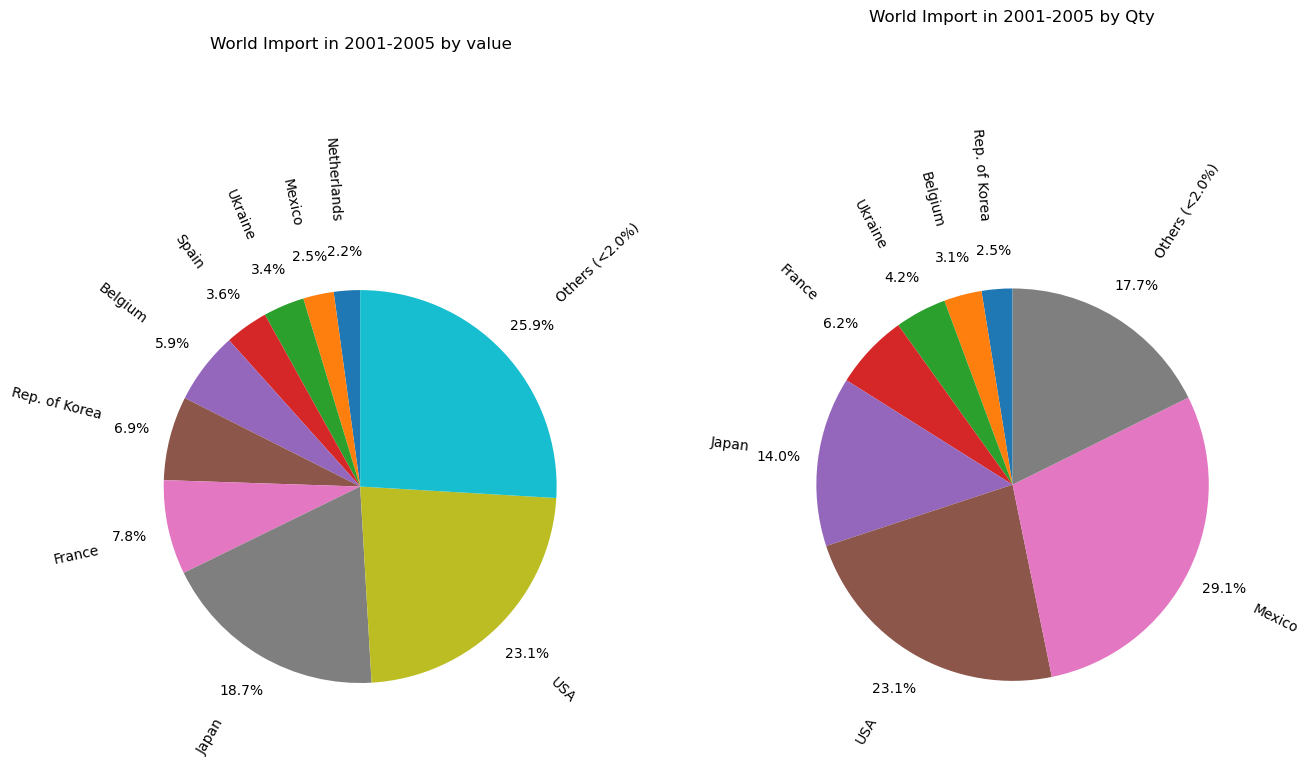

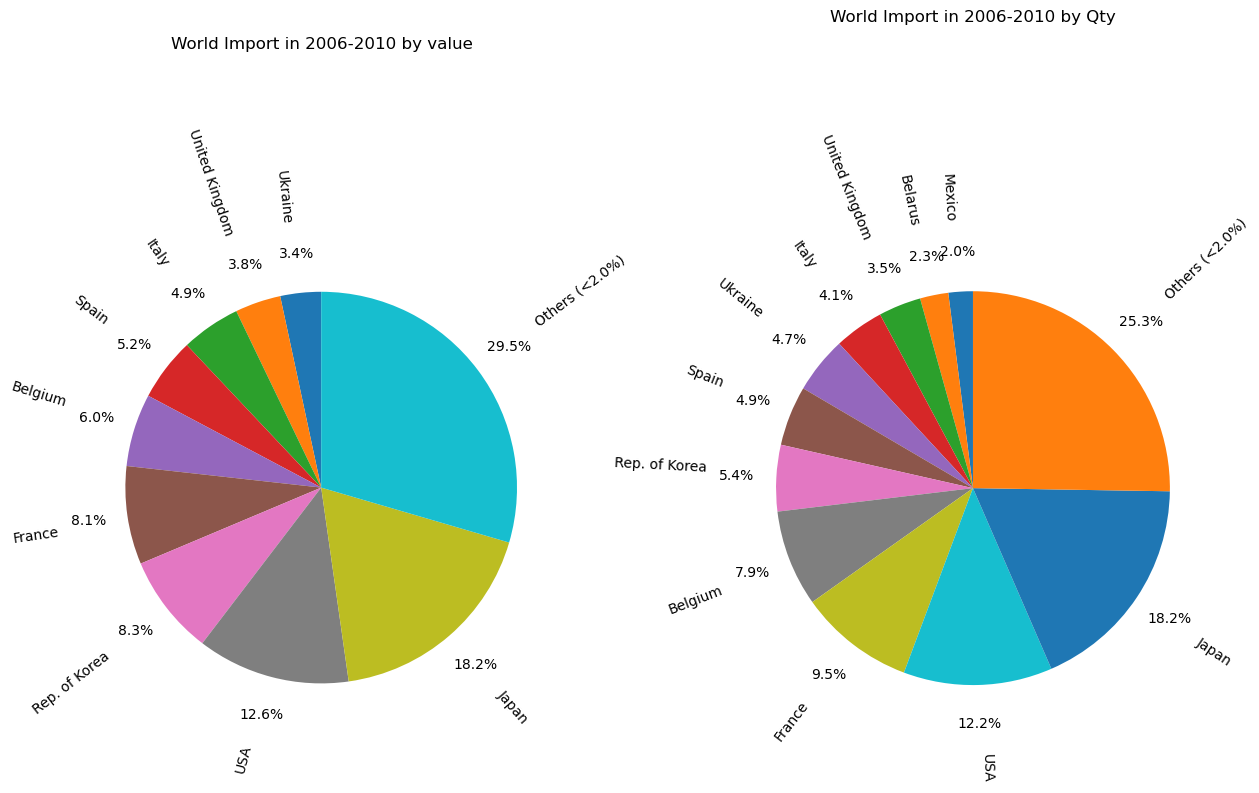

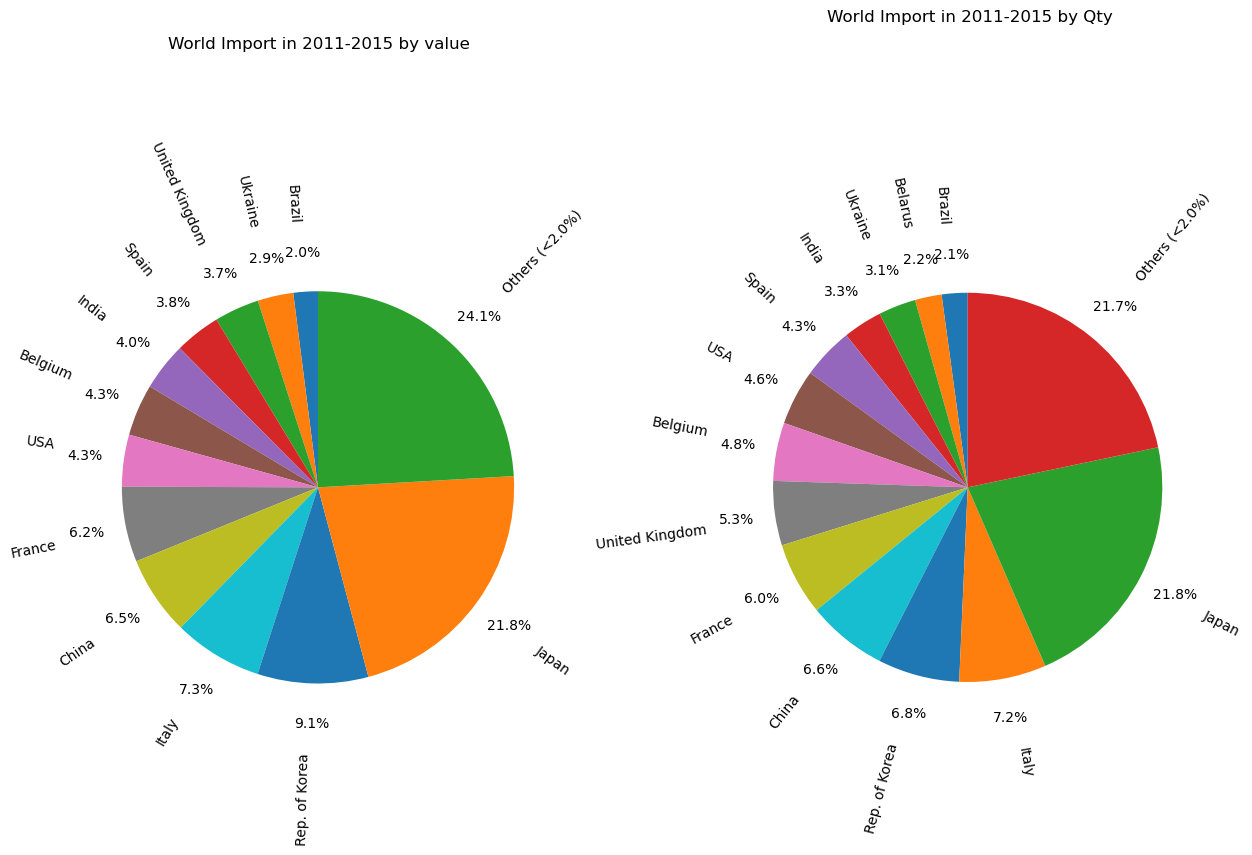

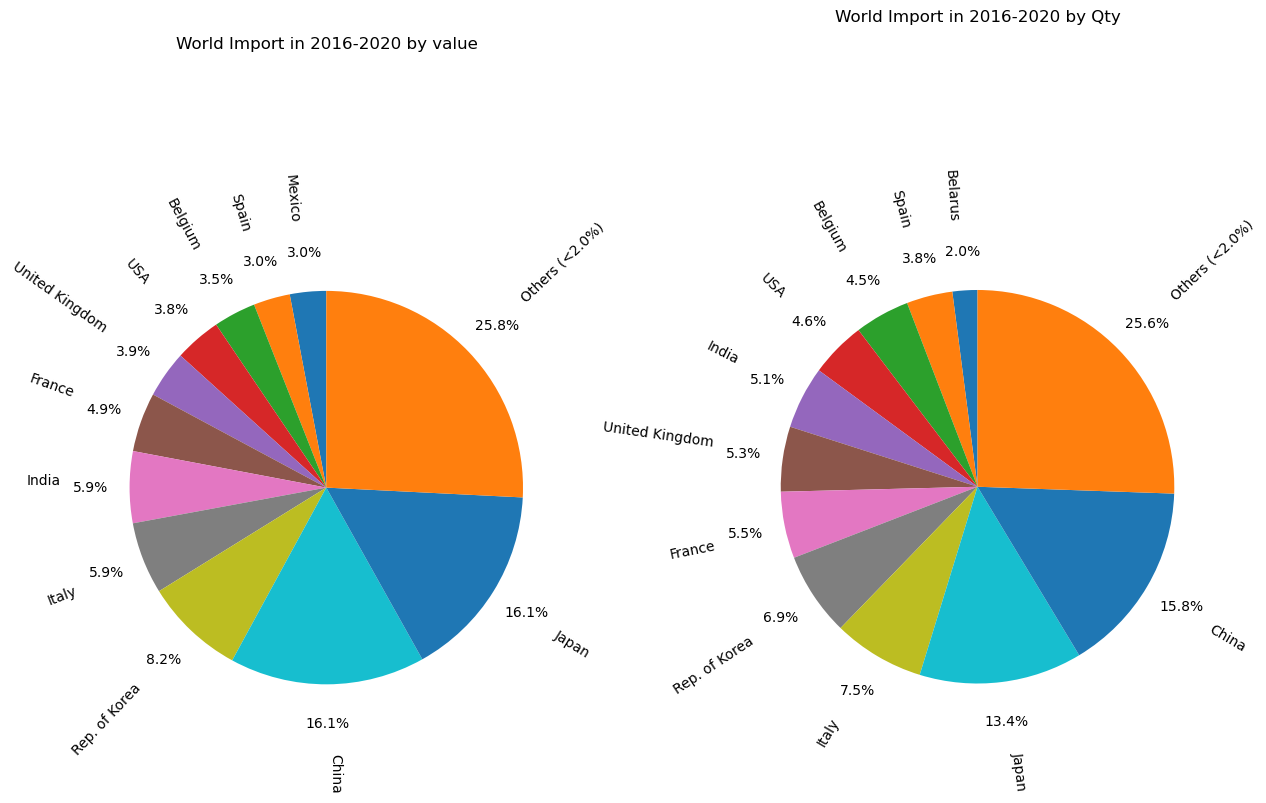

In [23]:
for i in range(4):
    plot_pie(WIm_list[i], 0.02)
    plt.show()


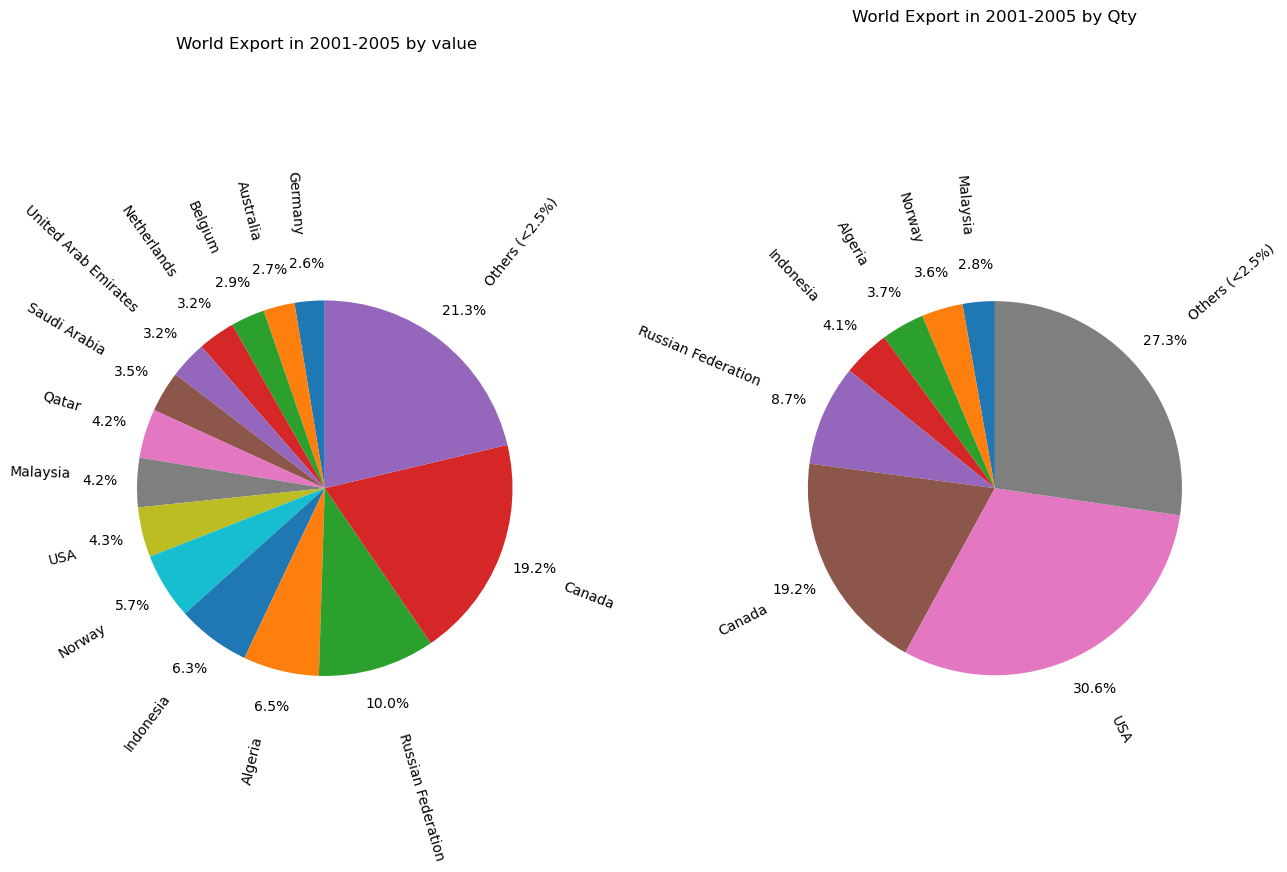

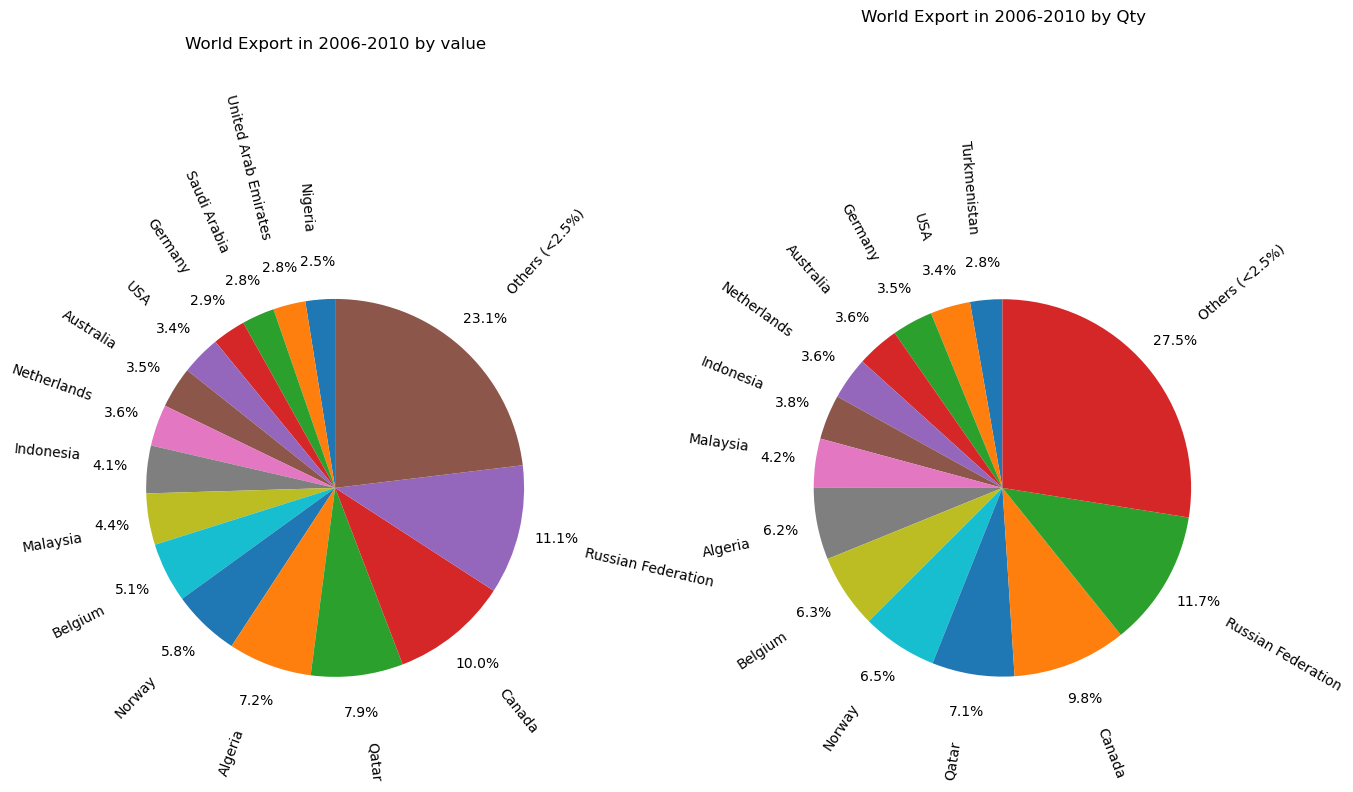

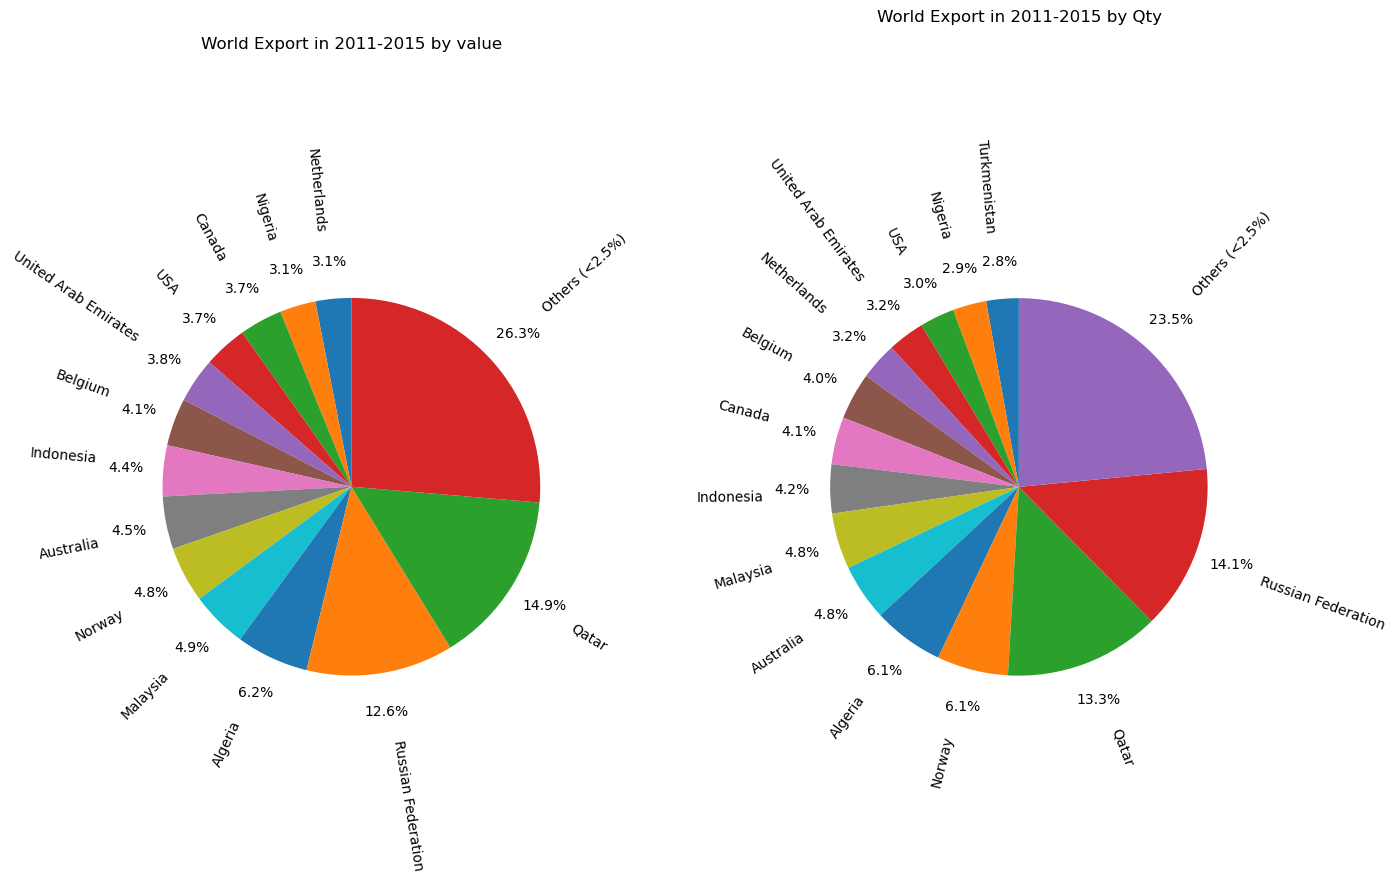

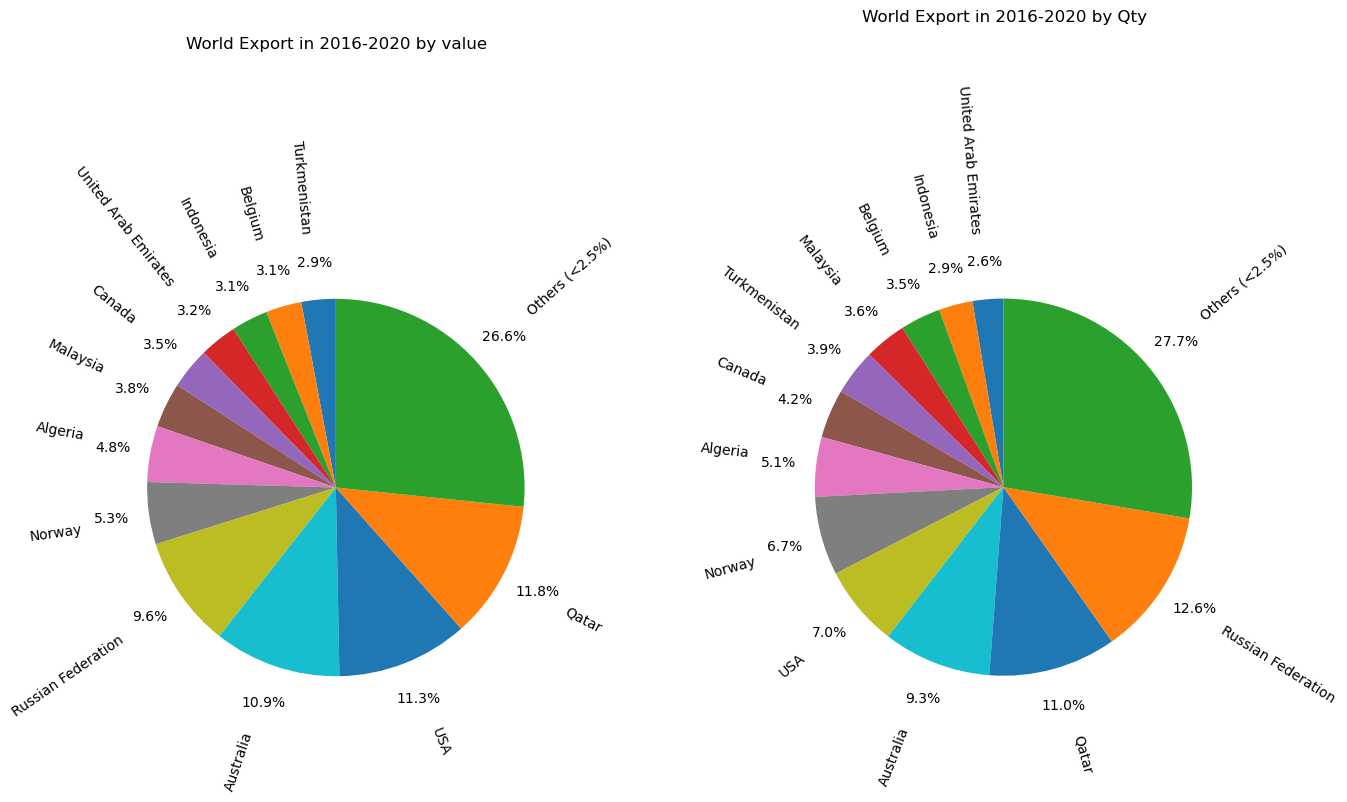

In [24]:
for i in range(4):
    plot_pie(WEx_list[i], 0.025, 0.6)
    plt.show()

In [25]:
def plot_line_sub(List, cl = None, s = 'Import'):
    countries = set()
    x=['2001-2005', '2006-2010', '2011-2015', '2016-2020']
    
    for i in List:
        countries.update(list(i[1].sort_values(by = 'PrimaryValue', ascending = False).head(2)['ReporterDesc']))
        countries.update(list(i[1].sort_values(by = 'Qty', ascending = False).head(1)['ReporterDesc']))
    values = []
    Qty = []
    
    for i in countries:
        val = []
        qt = []
        for j in range(4):
            val.append(int(List[j][1][List[j][1]['ReporterDesc'] == i]['PrimaryValue'].sum()))
            qt.append(int(List[j][1][List[j][1]['ReporterDesc'] == i]['Qty'].sum()))
        values.append([i, val])
        Qty.append([i, qt])
    plt.figure(figsize=(14, 7))
    plt.subplot(1,2,1)
    plt.title(s+' in 2001-2020 by Value', fontsize = 16)
    for i in values:
        plt.plot(x, i[1], 'o-r', label = i[0], color = cl[i[0]] if cl != None else 'r')
    plt.legend()
    plt.xlabel("Period", fontsize = 12)
    plt.ylabel("Value in US dollars", fontsize = 12)
    plt.subplot(1,2,2)
    for i in Qty:
        plt.plot(x, i[1],'o-.g', label = i[0], color = cl[i[0]] if cl != None else 'r')
    plt.title(s + ' in 2001-2020 by Qty', fontsize = 16)
    plt.legend()
    plt.xlabel("Period", fontsize = 12)
    plt.ylabel("Qty in kg", fontsize = 12)
    plt.show()
        

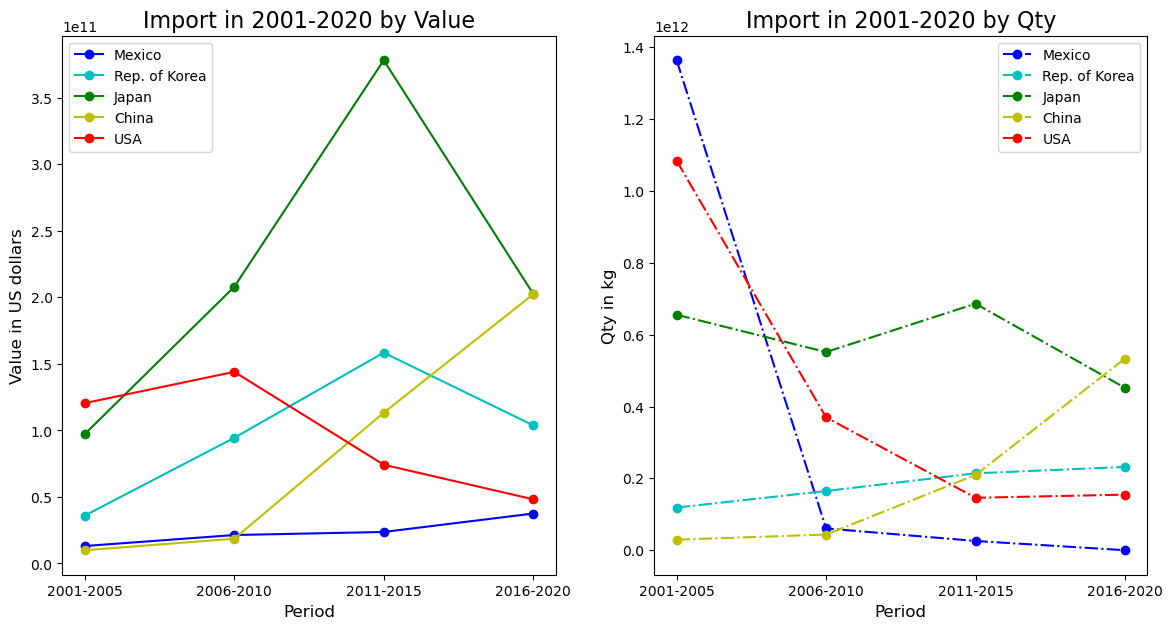

In [26]:
cl = {'Mexico' : 'b', 'China': 'y', 'Japan': 'g', 'USA': 'r', 'Rep. of Korea': 'c'}
plot_line_sub(WIm_list, cl)

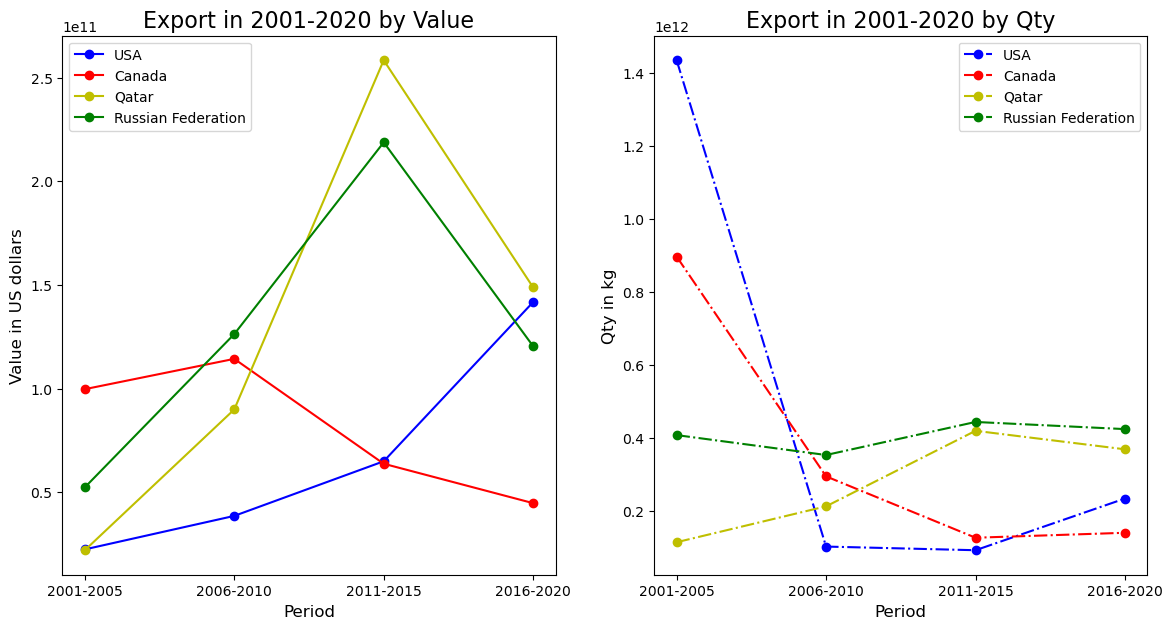

In [27]:
cl = {'USA' : 'b', 'Russian Federation': 'g', 'Canada': 'r', 'Qatar': 'y'}
plot_line_sub(WEx_list, cl, s = 'Export')

In [28]:
Im_01_05[Im_01_05['ReporterDesc'] == 'Mexico']

,ReporterDesc,FlowDesc,PartnerDesc,CmdDesc,Qty,PrimaryValue
1187,Mexico,Import,Algeria,Petroleum gases and other gaseous hydrocarbons,3.624810e+08,4.027777e+07
1188,Mexico,Import,Argentina,Petroleum gases and other gaseous hydrocarbons,2.809136e+08,3.121425e+07
1189,Mexico,Import,Denmark,Petroleum gases and other gaseous hydrocarbons,6.453564e+04,7.171000e+03
1190,Mexico,Import,Ecuador,Petroleum gases and other gaseous hydrocarbons,3.262864e+07,3.625594e+06
1191,Mexico,Import,France,Petroleum gases and other gaseous hydrocarbons,8.473058e+04,9.415000e+03
...,...,...,...,...,...,...
8917,Mexico,Import,Saudi Arabia,Petroleum gases and other gaseous hydrocarbons,1.529045e+08,4.504900e+07
8918,Mexico,Import,Spain,Petroleum gases and other gaseous hydrocarbons,6.070000e+03,1.794000e+03
8919,Mexico,Import,United Kingdom,Petroleum gases and other gaseous hydrocarbons,4.403700e+04,1.290000e+04
8920,Mexico,Import,USA,Petroleum gases and other gaseous hydrocarbons,5.735765e+09,1.230441e+09


In [29]:
def plot_line(List):
    countries = set()
    x=['2001-2005', '2006-2010', '2011-2015', '2016-2020']
    cl = {'Mexico' : 'b', 'China': 'y', 'Japan': 'g', 'USA': 'r', 'Rep. of Korea': 'c'}
    for i in List:
        countries.update(list(i[1].sort_values(by = 'PrimaryValue', ascending = False).head(1)['ReporterDesc']))
        countries.update(list(i[1].sort_values(by = 'Qty', ascending = False).head(1)['ReporterDesc']))
    values = []
    Qty = []
    
    for i in countries:
        val = []
        qt = []
        for j in range(4):
            val.append(int(List[j][1][List[j][1]['ReporterDesc'] == i]['PrimaryValue'].sum()))
            qt.append(int(List[j][1][List[j][1]['ReporterDesc'] == i]['Qty'].sum()))
        values.append([i, val])
        Qty.append([i, qt])
        
    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax2 = ax1.twinx()
    
    #ax1.title('Import in 2000-2020 by Value and Qty')
    
    for i,j in zip(values, Qty):
        ax1.plot(x, i[1], label = i[0] + ' Value', color = cl[i[0]])
        ax2.plot(x, j[1],'o-.g', label = i[0] + ' Qty', color = cl[i[0]])
    plt.legend()
    

    ax1.set_ylabel("Value in US dollars",  fontsize=14)
    ax1.tick_params(axis='y')

    ax2.set_ylabel("Qty in kg", fontsize=14)
    ax2.tick_params(axis="y")

    fig.autofmt_xdate()
    fig.suptitle("Temperature down, price up", fontsize=20)

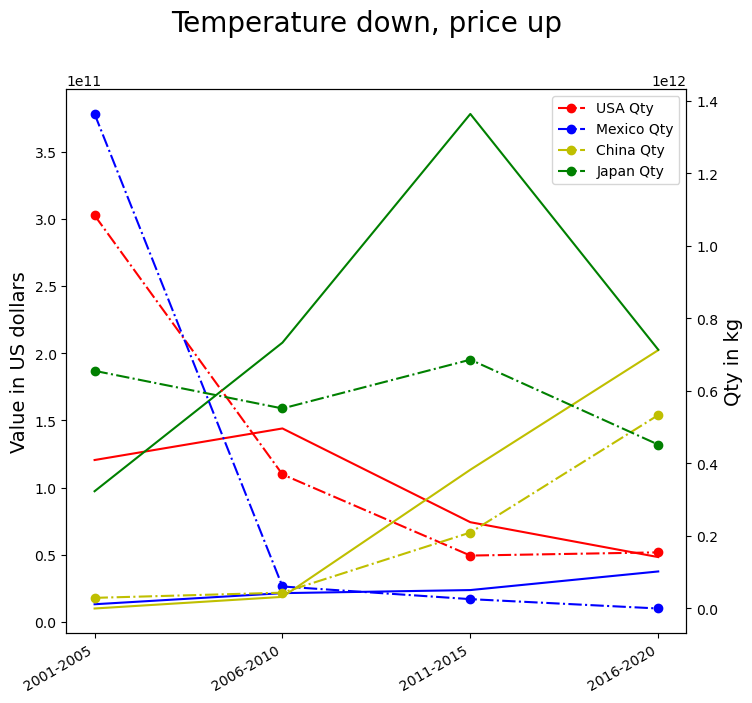

In [30]:
plot_line(WIm_list)

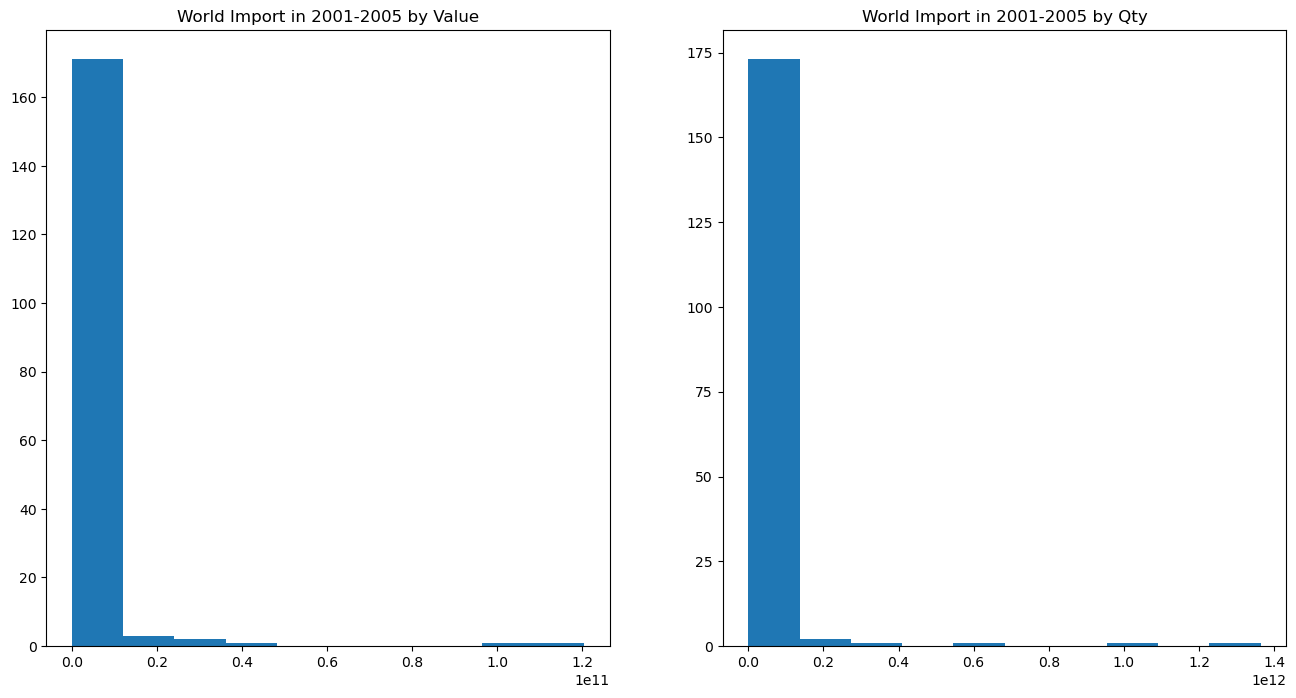

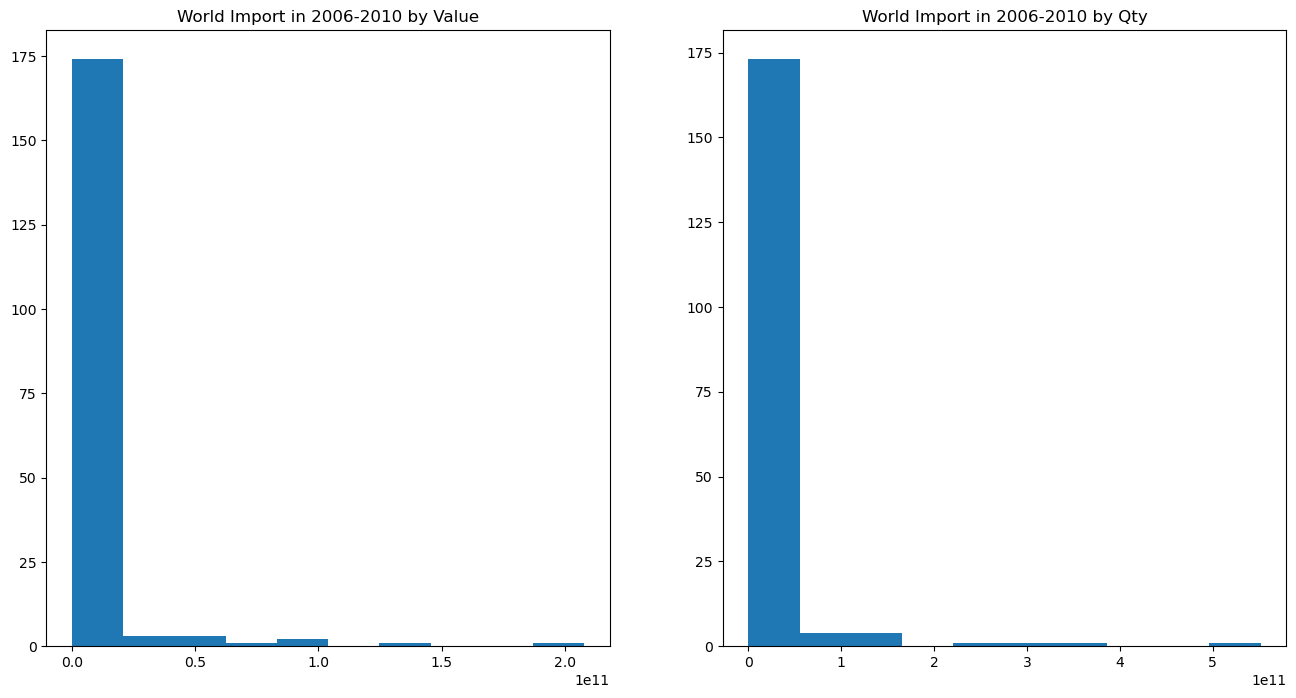

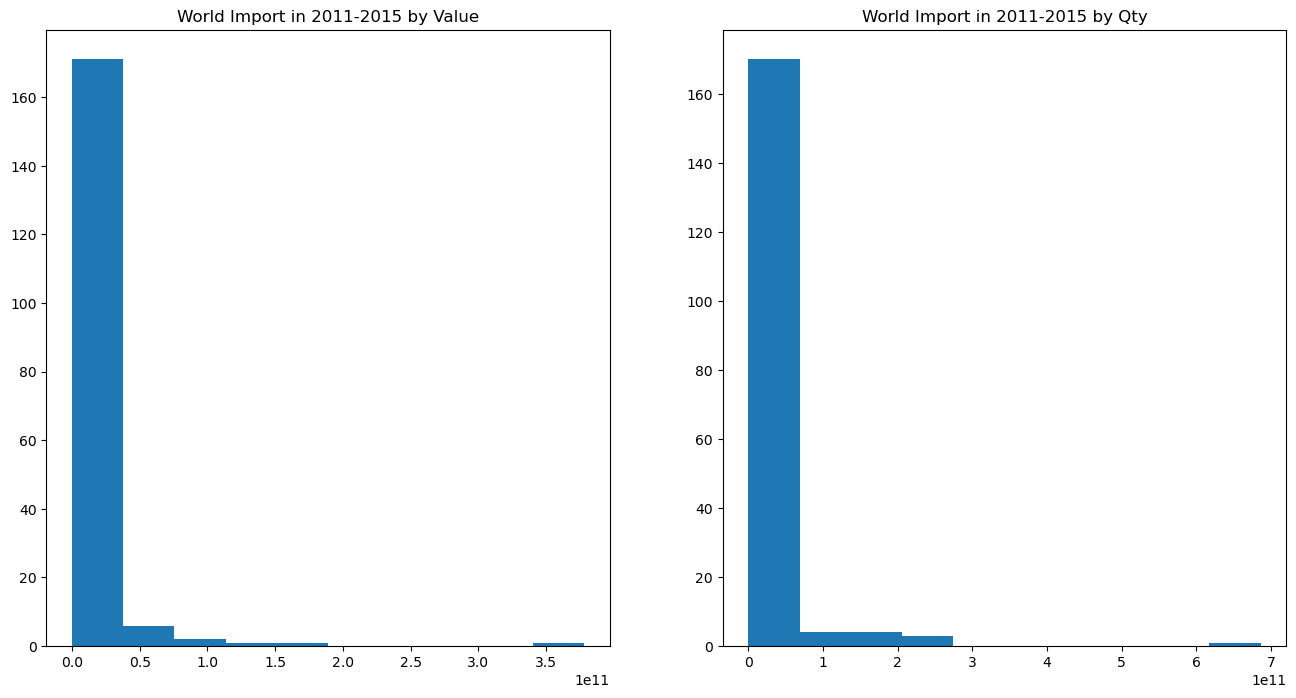

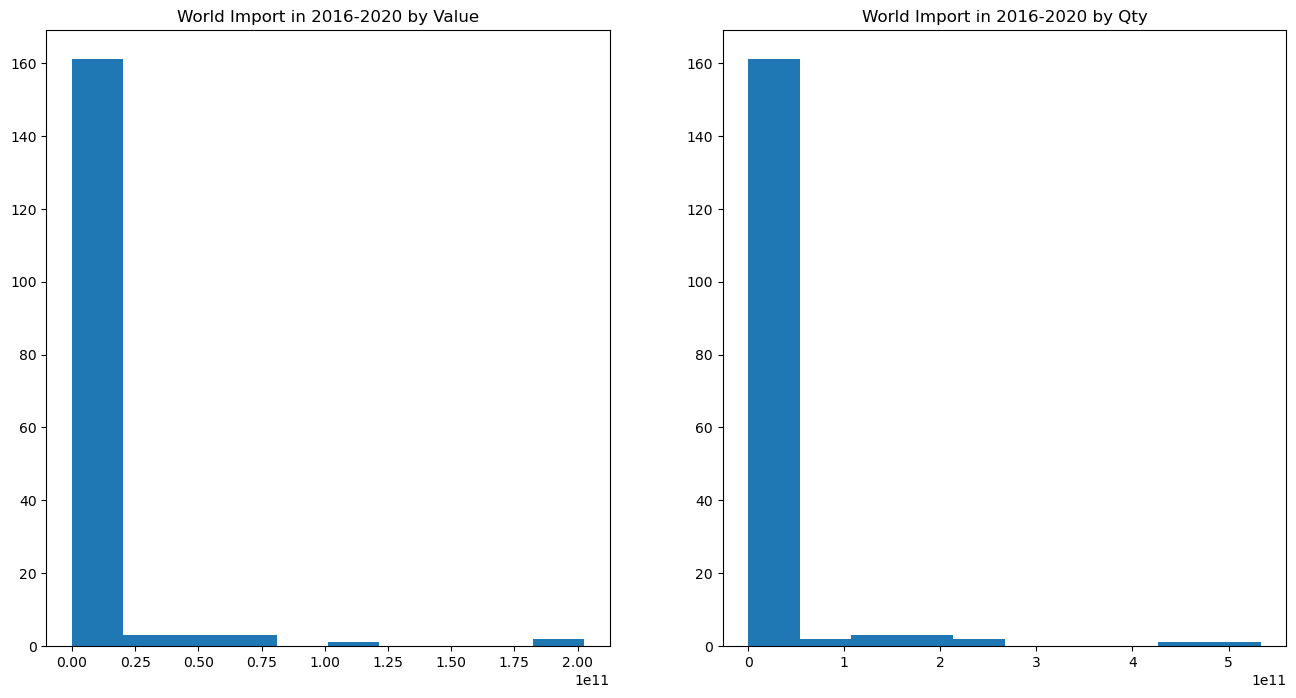

In [31]:
for i in WIm_list:
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title(i[0]+' by Value')
    plt.hist(i[1]['PrimaryValue'])
    plt.subplot(1,2,2)
    plt.title(i[0]+' by Qty')
    plt.hist(i[1]['Qty'])
    plt.show()

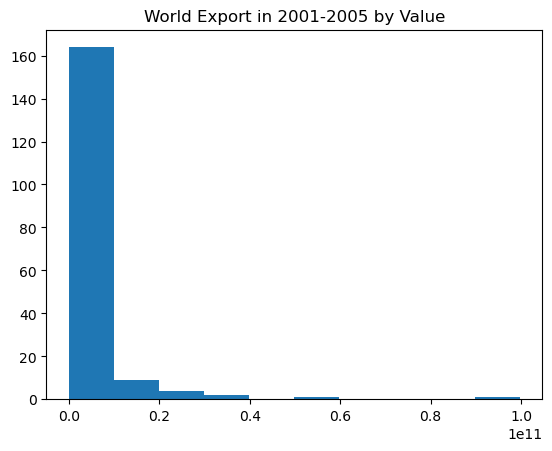

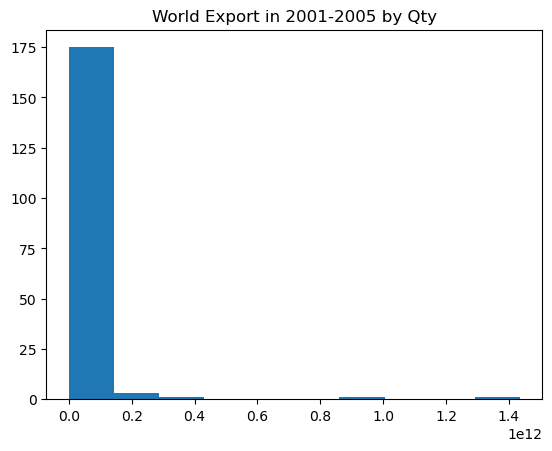

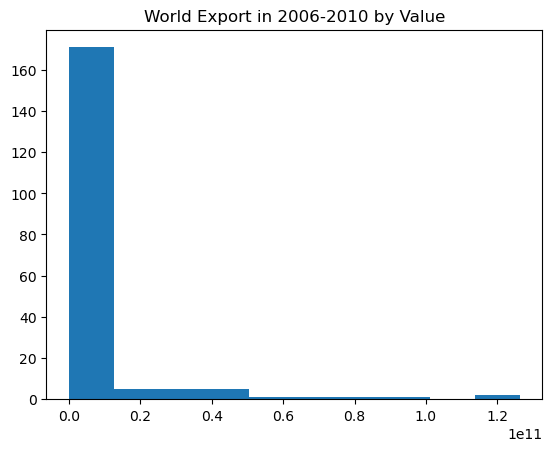

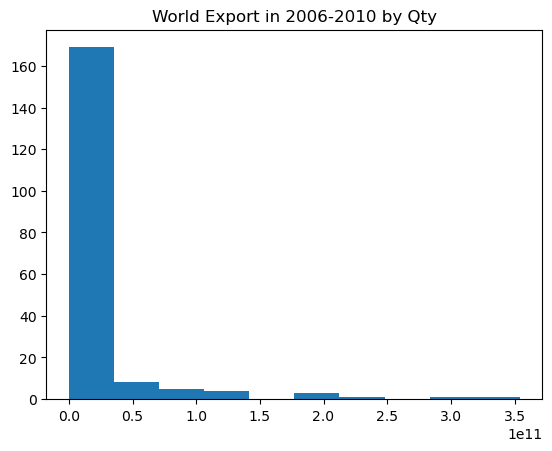

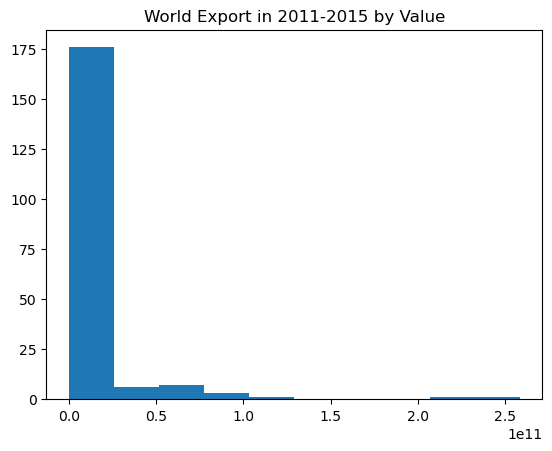

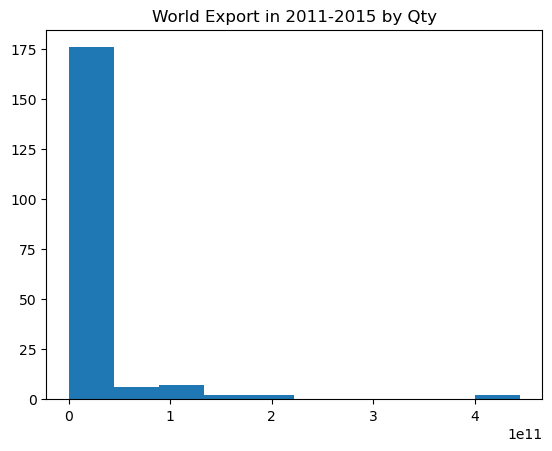

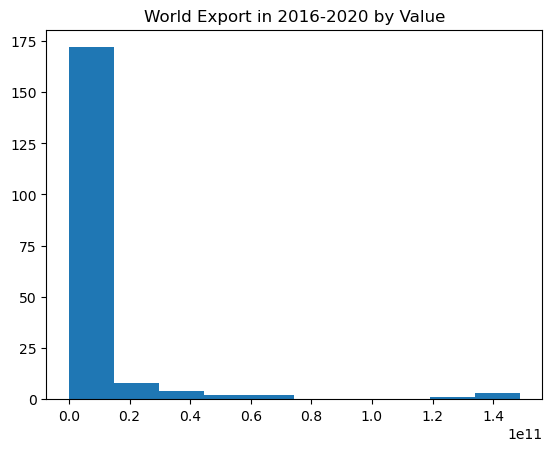

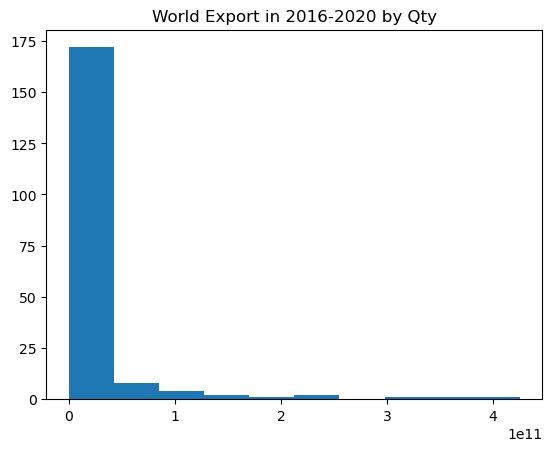

In [32]:
for i in WEx_list:
    plt.title(i[0]+' by Value')
    plt.hist(i[1]['PrimaryValue'])
    plt.show()
    plt.title(i[0]+' by Qty')
    plt.hist(i[1]['Qty'])
    plt.show()

# Графы

In [33]:
from sklearn.preprocessing import normalize

In [34]:
import networkx as nx
import matplotlib.colors as mcolors
import slric

In [35]:
def plot_line_cen(df, cl = None, s = 'centrality', n = 2):
    countr = set()
    x=['2001-2005', '2006-2010', '2011-2015', '2016-2020']
    
    for i in x:
        countr.update(list(df.sort_values(by = i, ascending = False).head(n)['country']))
    countr = list(countr)
    values = []
    
    for i in countr:
        val = []
        for j in x:
            val.append(float(df[df['country'] == i][j]))
        values.append(val)
    plt.figure(figsize=(14, 7))
    plt.title(s + ' centrality', fontsize = 16)
    for i in range(len(values)):
        plt.plot(x, values[i], 'o-r', label = countr[i], color = list(mcolors.BASE_COLORS.keys())[i])
    plt.legend()
    plt.xlabel("Period", fontsize = 12)
        

In [36]:
for i in Im_list:
    i[1].rename(columns = {'PartnerDesc':'source', 'ReporterDesc':'target', 'PrimaryValue' : 'weight'}, inplace = True )

In [37]:
countries = set()
for i in Im_list:
    countries |= set(i[1]['source'])
    countries |= set(i[1]['target'])
di = dict(map(lambda x: (x, []), countries))

In [38]:
d = di.copy()
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    scaled['weight'] = normalize(np.array(i[1][['weight']]))
    G.add_edges_from(np.array((scaled[['source', 'target']])))
    x = nx.betweenness_centrality(G)
    for i, j in d.items():
        j.append(x.get(i, None))

In [39]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
betweenness_df = pd.DataFrame(cen_dict)

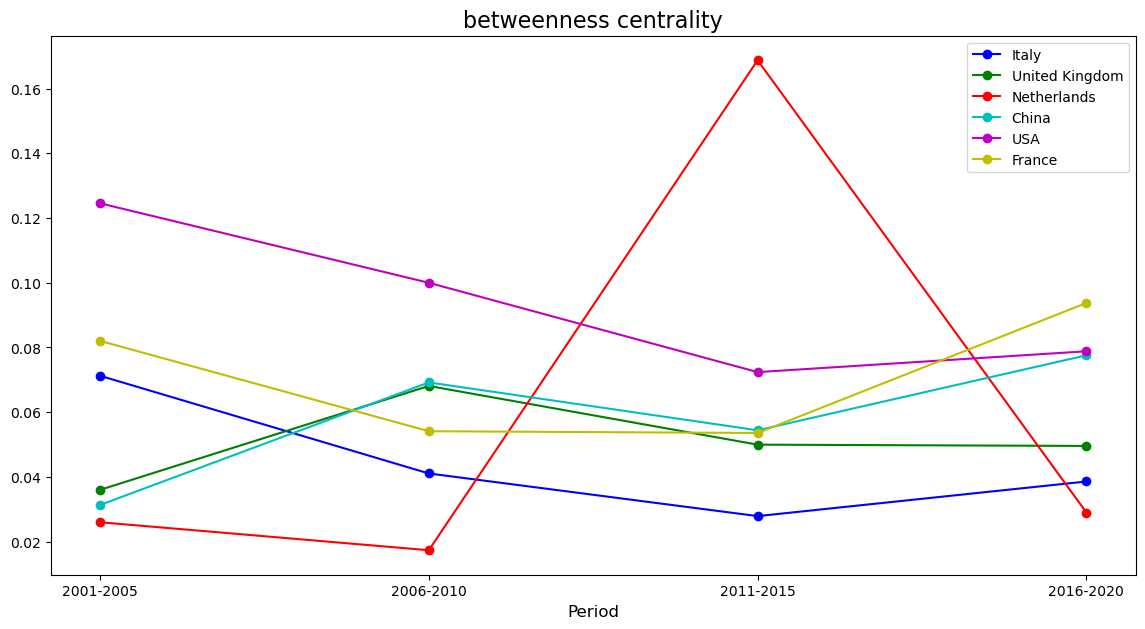

In [40]:
plot_line_cen(betweenness_df, s = 'betweenness', n = 3)

In [41]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = dict(G.in_degree(weight = 'weight'))
    for i, j in d.items():
        j.append(x.get(i, None))

In [42]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
in_degree_df = pd.DataFrame(cen_dict)

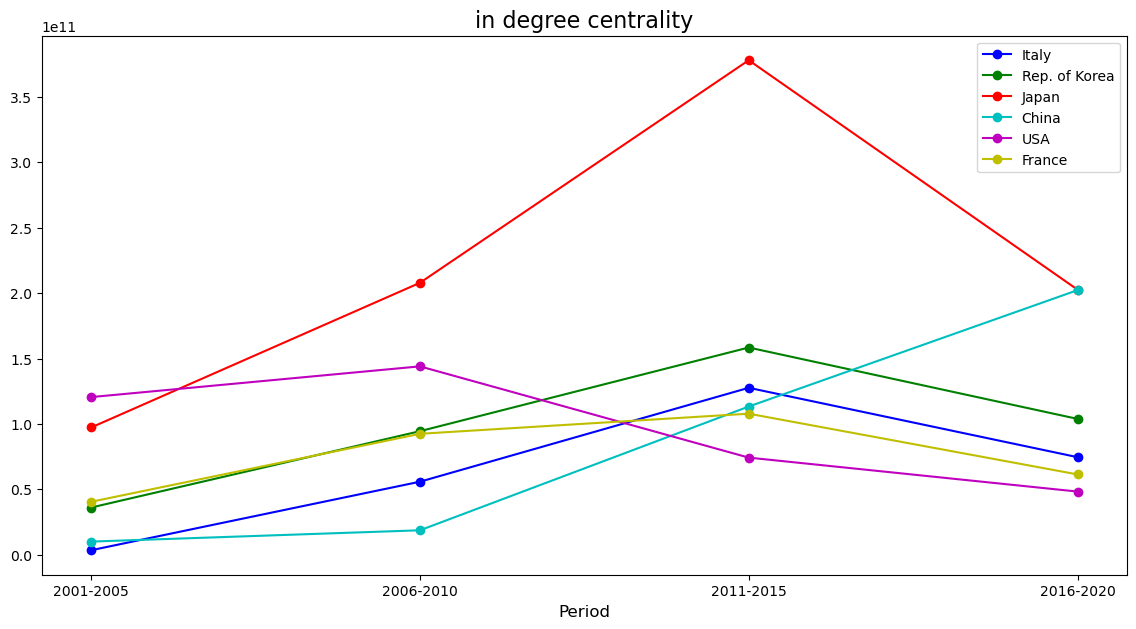

In [43]:
plot_line_cen(in_degree_df, s = 'in degree', n = 3)

In [44]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = dict(G.out_degree(weight = 'weight'))
    for i, j in d.items():
        j.append(x.get(i, None))

In [45]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
out_degree_df = pd.DataFrame(cen_dict)

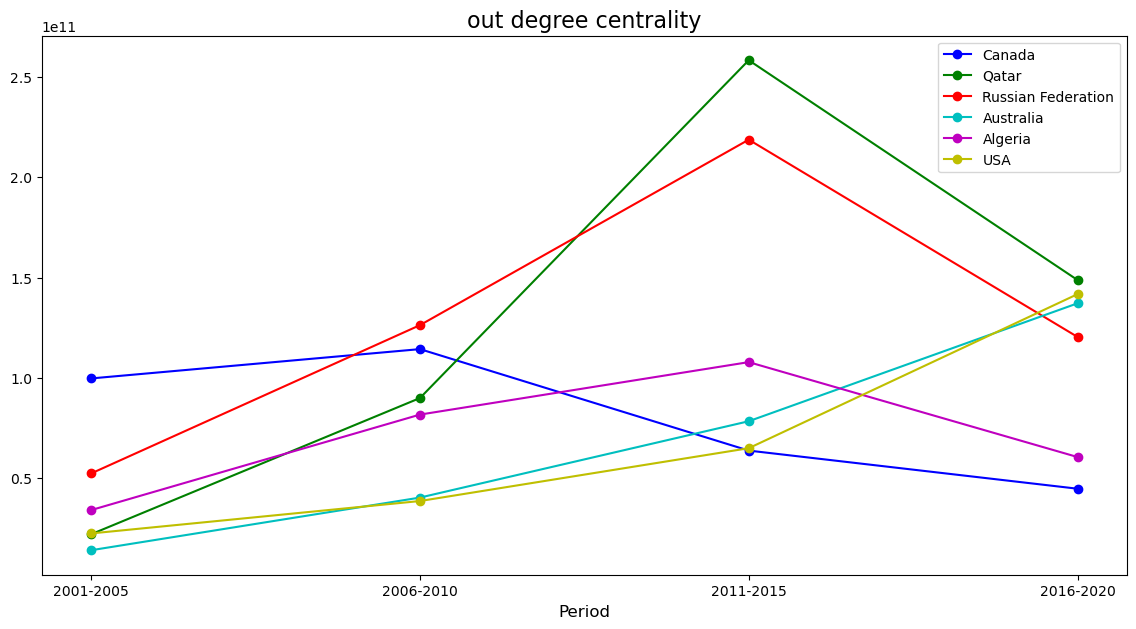

In [46]:
plot_line_cen(out_degree_df, s = 'out degree', n = 3)

In [47]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = dict(G.degree(weight = 'weight'))
    for i, j in d.items():
        j.append(x.get(i, None))

In [48]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
degree_df = pd.DataFrame(cen_dict)

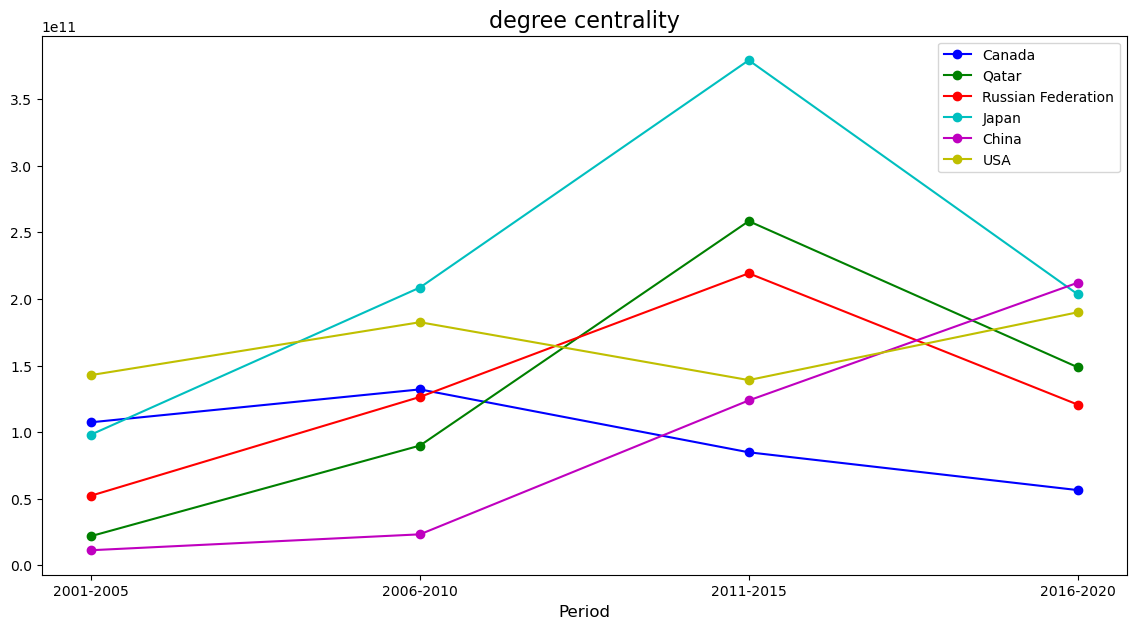

In [49]:
plot_line_cen(degree_df, s = 'degree', n = 3)

In [50]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = dict(nx.pagerank(G, weight = 'weight'))
    for i, j in d.items():
        j.append(x.get(i, None))

In [51]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
pagerank_df = pd.DataFrame(cen_dict)

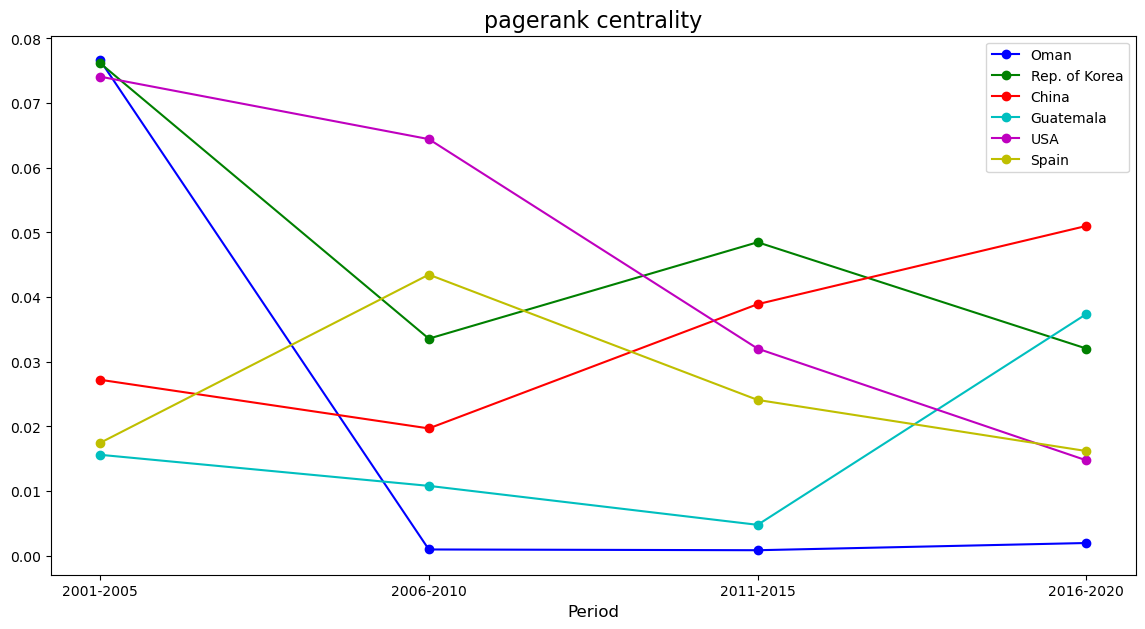

In [52]:
plot_line_cen(pagerank_df, s = 'pagerank', n = 2)

In [53]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = dict(nx.closeness_centrality(G))
    for i, j in d.items():
        j.append(x.get(i, None))

In [54]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
closeness_centrality_df = pd.DataFrame(cen_dict)

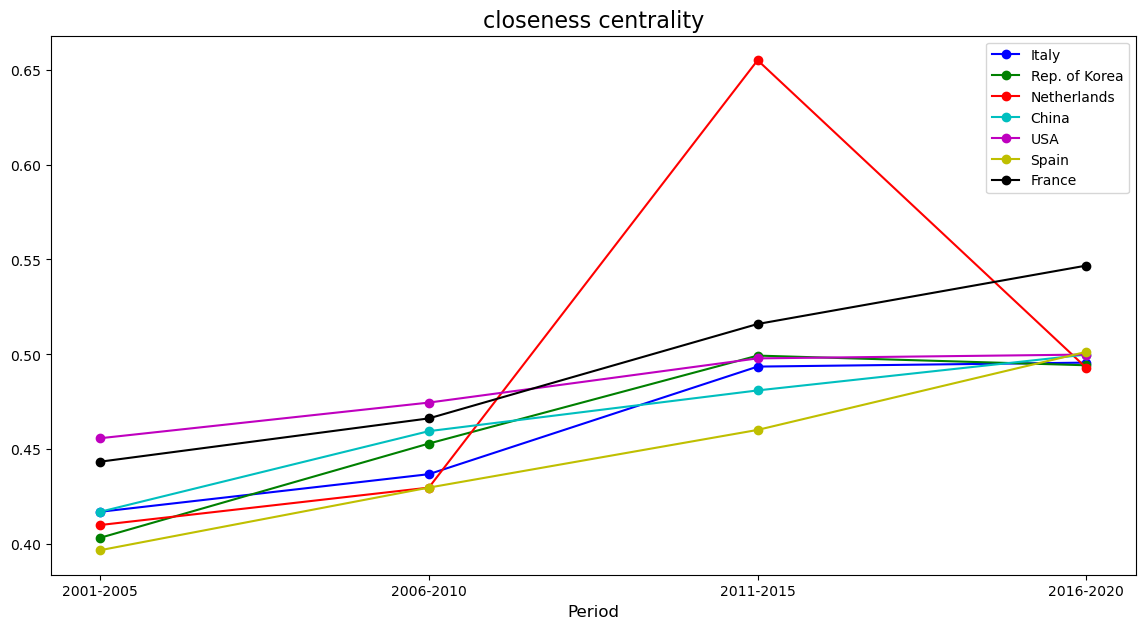

In [55]:
plot_line_cen(closeness_centrality_df, s = 'closeness', n = 3)

In [56]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = slric.sric(G, q=50, size=1)
    for i, j in d.items():
        j.append(x.get(i, None))

In [57]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
sric_centrality_df = pd.DataFrame(cen_dict)

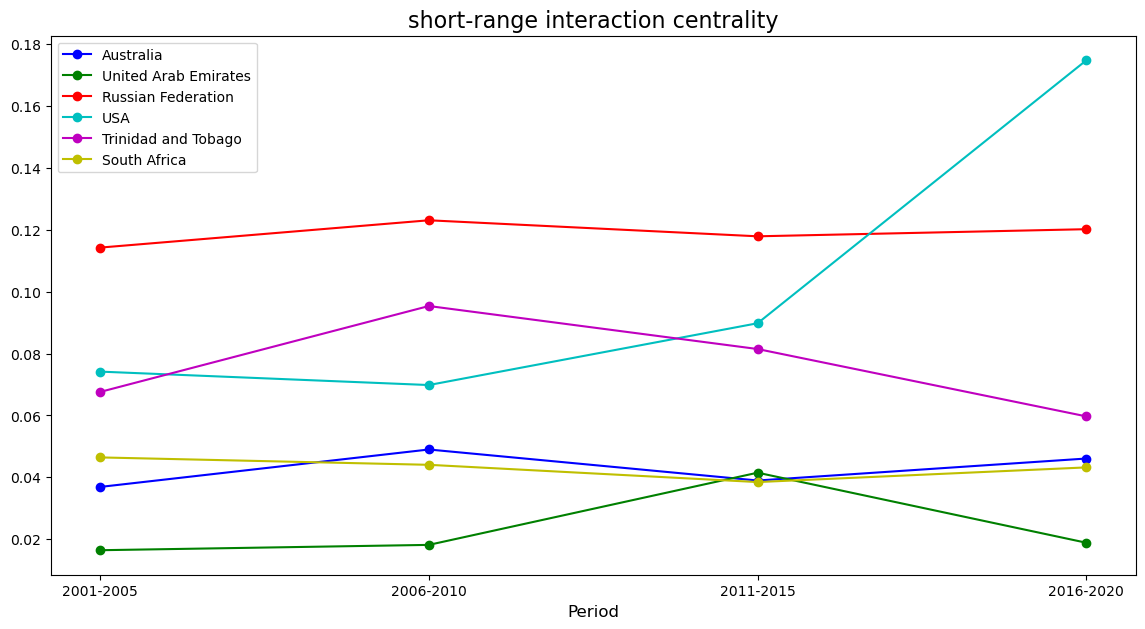

In [58]:
plot_line_cen(sric_centrality_df, s = 'short-range interaction', n = 4)

In [59]:
d = dict(map(lambda x: (x, []), countries))
for i in Im_list:
    G=nx.DiGraph()
    scaled = i[1].copy()
    G.add_weighted_edges_from(np.array((scaled[['source', 'target', 'weight']])))
    x = slric.lric(G, q=50, size=1, models='maxmin', limpath = 3)
    for i, j in d.items():
        j.append(x.get(i, None))

In [60]:
cen_dict = {'country': [], '2001-2005': [], '2006-2010': [], '2011-2015': [], '2016-2020': []}
for i, j in d.items():
    cen_dict['country'].append(i)
    cen_dict['2001-2005'].append(j[0])
    cen_dict['2006-2010'].append(j[1])
    cen_dict['2011-2015'].append(j[2])
    cen_dict['2016-2020'].append(j[3])
lric_centrality_df = pd.DataFrame(cen_dict)

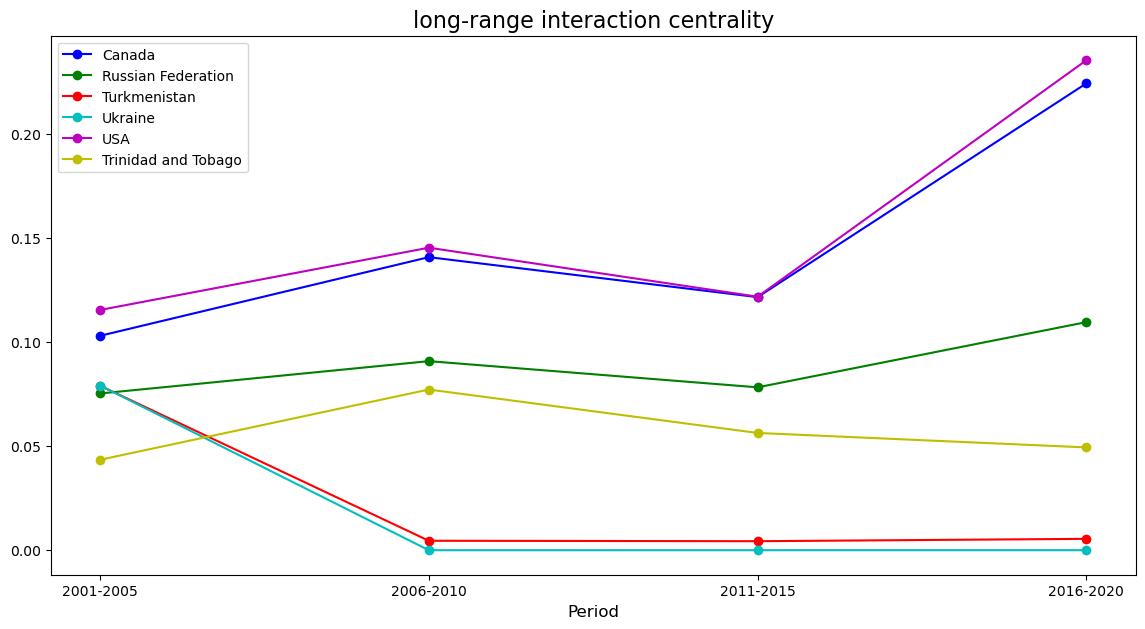

In [63]:
plot_line_cen(lric_centrality_df, s = 'long-range interaction', n = 4)

In [62]:
for i in Im_list:
    name = 'Data/'+i[0].replace(' ', '_')+'.csv'
    y = i[1].reset_index(inplace= False).rename(columns = {'source':'Source', 'target':'Target', 'weight' : 'Weight', 'index': 'id'}, inplace = False )
    y.drop(columns='Qty', axis= 1).to_csv(name, index= False)